# Figsetup
Using chou 20210513 unsort data. <br>
shortcaption: A reconstructed kernel from SVD compared with the original kernel<br>
label: real_STK_stsection

In [1]:
filename = 'real_STK_stsection'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

In [4]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)
figmap = np.flipud(figmap)

# load files 

In [5]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
direction = 'UD'

SVDnSTK = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\STK.mat'
                  , squeeze_me =True)
RFprop  = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat'
                  , squeeze_me =True)

loadfiles = np.load(exp_folder+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)

In [6]:
r = RFprop['RF_properties']['radius']

RFprop = RFprop['RF_properties']

STK = SVDnSTK['gauss_RF']

# cn = 9

# Single RF

In [7]:
cn = 9

In [8]:
centerx = (RFprop['X_Coor'][cn-1]-BS['leftx_bd'])/(BS['rightx_bd']-BS['leftx_bd'])*27-0.5
centery = (RFprop['Y_Coor'][cn-1]-BS['lefty_bd'])/(BS['righty_bd']-BS['lefty_bd'])*27-0.5

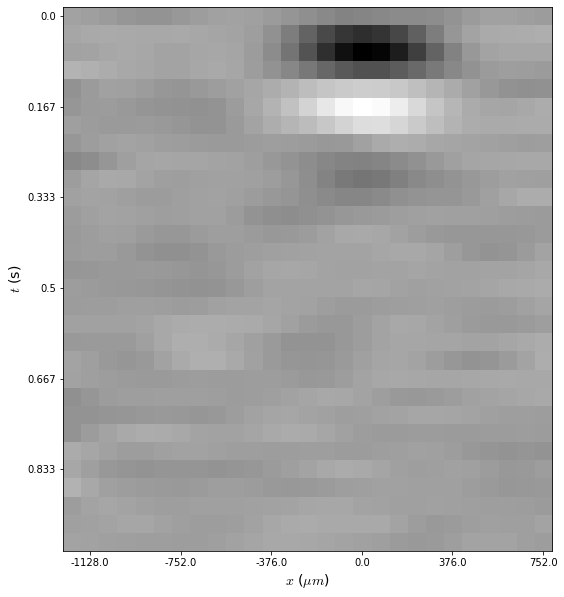

In [9]:
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.labelsize'] =  10
plt.rcParams['ytick.labelsize'] =  10

plt.imshow(STK[:,:,4,cn-1], cmap = 'gray')
plt.yticks(np.arange(0,STK.shape[0],5), np.round(np.arange(0,STK.shape[0],5)/30, 3))
plt.ylabel(r'$t$ (s)')
plt.xticks([1, 6, 11, 16, 21, 26], np.round( np.arange(-3,3)*5/27*267*BS['micro_per_pixel'] ) )
plt.xlabel(r'$x$ ($\mu m$)')
# plt.title(r'$K_{st}(t, x)$', fontsize = 18)
plt.gcf().set_size_inches(10, 10)

plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)